# Homework 2: Analyzing Rates of Sea Level Rise
In this homework, you'll investigate sea level change using data from the ECCO state estimate. You'll look at spatial differences over the past few decades and then compare how sea level on the California coast compares to the global mean.

Begin by importing the modules you'll need for this notebook:

In [10]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm
import datetime as dt

## Part 1: Download Sea Surface Height Data
To begin this exercise, download all of the available sea surface height data (1992-2017) from the ECCO Version 4 Release 4 output. There are several different variables for sea surface height pertaining to different components and corrections. In this homework, we'll use the `SSHDYN` variable which is equivalent to what satellites would measure from space.

To obtain the data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes.

In [11]:
# define the path to the folder where the SSH data has been download on your machine
ssh_folder = '/Volumes/T7/ms274/data'

## Part 2: Plot Total Sea Level Rise 1992-2017
As a first look into how sea level has changed in the past several decades, we'll look at the differences between two time periods at the beginning and end of the available model output: January 1992 and January 2017. It is important to use the same month because variations in sea level also have a seasonal cycle (as we'll see below). Begin by reading in the data:

In [12]:
# read in the longitude, latitude, and model ssh grid in January 1992 (SSHDYN_1992_01.nc)
ssh_jan_1992_file = os.path.join(ssh_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN','SSHDYN_1992_01.nc')

ds = xr.open_dataset(ssh_jan_1992_file)
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
SSHDYN = np.array(ds['SSHDYN'][:])
ssh_jan_1992 = np.array(ds['SSHDYN'][:])
ds.close()

# read in the model ssh grid in January 2017 (SSHDYN_2017_01.nc)
ssh_jan_2017_file = os.path.join(ssh_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN','SSHDYN_2017_01.nc')

ds = xr.open_dataset(ssh_jan_2017_file)
ssh_jan_2017 = np.array(ds['SSHDYN'][:])
ds.close()


Now, make a plot of the difference between January 2017 and January 1992. Be sure to add a colorbar with a divergent colormaps and set the color bounds to be equal in the positive and negative directions.

/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


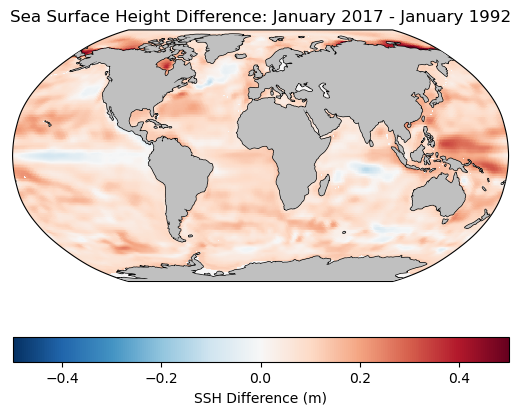

' NOTE: I keep getting the error below, but can\'t figure out how to get rid of it: \n"/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer\n  return lib.buffer(\n/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers\n  return lib.covers(a, b, **kwargs)\n/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:806: RuntimeWarning: invalid value encountered in disjoint\n  return lib.disjoint(a, b, **kwargs)\n/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers\n  return lib.covers(a, b, **kwargs)"\n'

In [13]:
# make a plot of the differences between 2017 and 1992

# ssh difference between 2017 and 1992
ssh_difference = ssh_jan_2017 - ssh_jan_1992

ssh_difference = ssh_difference[0, :, :]

fig = plt.figure()
ax = plt.axes(projection=ccrs.Robinson())

# plot the ssh
plt.pcolormesh(longitude, latitude, ssh_difference, vmin=-.5, vmax=.5, cmap='RdBu_r',
               transform=ccrs.PlateCarree())
plt.colorbar(orientation = 'horizontal', label = 'SSH Difference (m)')

# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# format the axes
plt.title('Sea Surface Height Difference: January 2017 - January 1992')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

''' NOTE: I keep getting the error below, but can't figure out how to get rid of it: 
"/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:806: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)"
'''

### Questions:
Where are the largest increases in sea level observed between these two time periods? Are there any locations on the globe where sea level has fallen? If so, where?

Answer: The largest increases in sea level observed from 1992 to 2017 are in the Arctic regions, concentrated at the northern borders of Russia, Canada, and Alaska, as well as in the Husdon Bay and in the Micronesia region of the South Pacific. Interestingly, there are also some smaller regions on the globe where the sea level has fallen, primarily arounf the equator in the Pacific and Indian Ocean, as well as a smaller area in the South Indian Ocean, just above Antarctica. 

## Part 3: Create a Timeseries of Sea Surface Height in California
Next, we'll make a timeseries of sea surface height at a point off the California coast near San José. A close location in the model is at 37$^{\circ}$N, 122$^{\circ}$W. Begin by finding the closest row and column in the model grid to this longitude and latitude.

In [14]:
# define the latitude and longitude
lon = -122
lat = 37

# find the row and column closest to the location of the point off the CA coast
# note that you have already read in the longitude and latitude if the grid to make the plot above
lon_index = np.argmin(np.abs((-122) - longitude))

lat_index = np.argmin(np.abs((37) - latitude))

# sanity check
print('Closest longitude to -122 in the longitude array is', longitude[lon_index])
print('Closest latitude to 37 in the latitude array is', latitude[lat_index])

Closest longitude to -122 in the longitude array is -122.25
Closest latitude to 37 in the latitude array is 36.75


Now, armed with your sample location, loop through each sea surface height file to make a timeseries of sea level rise between 1992 and 2017. Every time you access a file, sample the model grid at the row and column you identified above.

In [15]:
# create a timeseries of ssh at the point above by looping through all of the ssh files
# each time through the loop, sample the ssh grid at the row and column identified above
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second
file_list = []

for year in range(1992, 2018):   # stop is exclusive, so use 2018
    for month in range(1, 13):
        file_list.append('SSHDYN' + '_'  + str(year) + '_' + '{:02d}'.format(month) + '.nc')

# checking format
print(len(file_list))
print(file_list[3])

# make a list to store the SSH values
time_values = []
ssh_values = []
months_since_start = 0

# loop through each file
for file_name in file_list:
    
    # identify path to the data file
    month_file = os.path.join(ssh_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN', file_name)
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    SSH_month = np.array(ds['SSHDYN'][:])
    ds.close()

    # add the data from the lat/lon profile created above and add to the list
    san_jose_ssh = SSH_month[0, lat_index, lon_index]
    ssh_values.append(san_jose_ssh)


      # ddd the time value - I chose months since Jan 1992
    time_values.append(months_since_start)
    months_since_start += 1
    
# convert lists to a numpy array
ssh_values  = np.array(ssh_values)
time_values = np.array(time_values)

# create the final timeseries array
san_jose_ssh_timeseries = np.empty((len(file_list), 2))
san_jose_ssh_timeseries[:, 0] = time_values
san_jose_ssh_timeseries[:, 1] = ssh_values

# sanity check
print(san_jose_ssh_timeseries.shape)
print(len(ssh_values))
print(san_jose_ssh_timeseries[3])

312
SSHDYN_1992_04.nc
(312, 2)
312
[3.         0.21468024]


## Part 4: Create a Timeseries of Global Mean Sea Surface Height
Next, make a timeseries of sea surface height averaged across the globe. Your loop should look quite similar to that above - you'll just need to make a slight change to average across the whole ocean rather than sampling at a single point.

In [16]:
# create a timeseries of the global mean ssh by looping through all of the ssh files
# each time through the loop, take the mean of the ssh grid at the row and column identified above
# when you take the mean, be sure to exclude 0 values, which pertain to land
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second

file_list = []
for year in range(1992, 2018):
    for month in range(1, 13):
        file_list.append('SSHDYN' + '_' + str(year) + '_' + '{:02d}'.format(month) + '.nc')

# make lists to store the global mean sea surface height values
global_mean_ssh_values = []
time_values = []
months_since_start = 0

for file_name in file_list:
    # identify path to the data file
    month_file = os.path.join(ssh_folder, 'Version4', 'Release4',
                              'interp_monthly', 'SSHDYN', file_name)
    
    # read in the dataset
    ds = xr.open_dataset(month_file)
    
    # get the SSH data array
    ssh_data = ds['SSHDYN'].isel(time=0)
    
    # exclude land values (where SSH is 0)
    ocean_only_data = ssh_data.where(ssh_data != 0)
    
    # calculate the mean of the ocean-only data
    global_mean_ssh = ocean_only_data.mean().values
    ds.close()

    # append mean to the global list
    global_mean_ssh_values.append(global_mean_ssh)
    
    # append the time value (months since jan 1992)
    time_values.append(months_since_start)
    months_since_start += 1
    
# lists to arrays
global_mean_ssh_values = np.array(global_mean_ssh_values)
time_values = np.array(time_values)

# make (N, 2) array with (time, mean ssh value)
global_ssh_timeseries = np.empty((len(file_list), 2))
global_ssh_timeseries[:, 0] = time_values
global_ssh_timeseries[:, 1] = global_mean_ssh_values

# sanity check
print(global_ssh_timeseries.shape)
print(global_ssh_timeseries[3])

(312, 2)
[ 3.         -0.12805939]


## Part 5: Compute Trends in Sea Surface Height
To compare the two timeseries, compute trends by fitting a line to each timeseries and examining the slope. Print out each trend in mm/yr, rounded to 2 decimal places. Note that the units of sea surface height are in meters.

In [17]:
# converting months to years for the x-axis
years = 1992 + san_jose_ssh_timeseries[:, 0] / 12

# compute the line coefficients of the trendlines, convert the ssh in m to mm
california_line_coefficients = np.polyfit(years, san_jose_ssh_timeseries[:, 1] * 1000, deg=1)
global_line_coefficients = np.polyfit(years, global_ssh_timeseries[:, 1] * 1000, deg=1)

# print results
print("California coast sea surface height trend:", round(california_line_coefficients[0], 2), "mm/yr")
print("Global mean sea surface height trend:", round(global_line_coefficients[0], 2), "mm/yr")

California coast sea surface height trend: 2.08 mm/yr
Global mean sea surface height trend: 3.38 mm/yr


### Question:
How does the trend in sea level rise in California compare to the global mean rate?

Answer: The trend in sea level rise in CA is less than the global mean rate, approximately 1.3 mm slower. This indicates that the sea level rise observed along the CA coast has been slower as compared to the global average. 

## Part 6: Plot the Timeseries of Sea Surface Height
Finally, plot the two timeseries on the same plot along with their trend lines. Be sure to label your axes and include a legend.

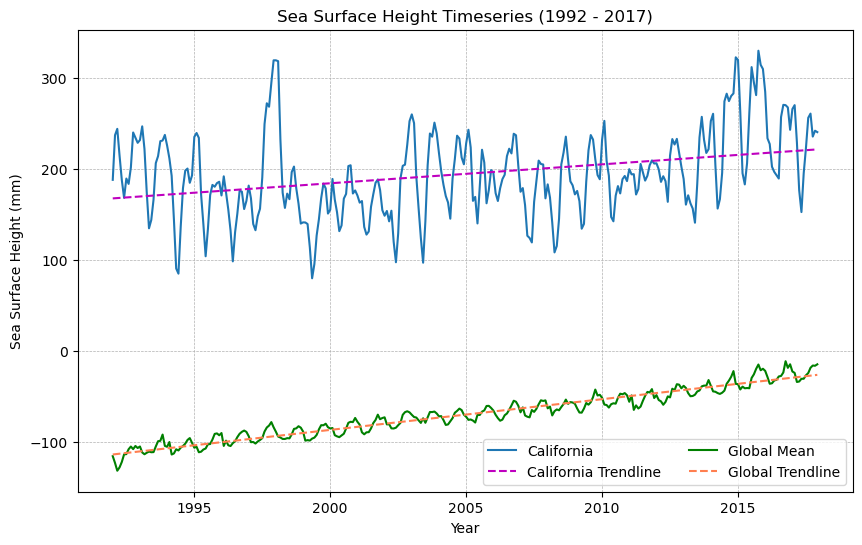

In [18]:
# create your plot here

# converting months to years for the x-axis
years = 1992 + san_jose_ssh_timeseries[:, 0] / 12

# plot the timeseries for san jose/california
fig = plt.figure(figsize=(10, 6))

# plot the data, convert the ssh in meters to mm
plt.plot(years, san_jose_ssh_timeseries[:, 1] * 1000, label='California')

# compute the line coefficients, convert the ssh in m to mm, and 
# plot the trend line
california_line_coefficients = np.polyfit(years, san_jose_ssh_timeseries[:, 1] * 1000, deg=1)
plt.plot(years, california_line_coefficients[0] * years + california_line_coefficients[1], 'm--', label = 'California Trendline')

plt.title('Sea Surface Height Timeseries (1992 - 2017)')
plt.xlabel('Year')
plt.ylabel('Sea Surface Height (mm)')
plt.grid(linestyle='--', linewidth=0.5)

# global ssh mean plot:

# plot the data, convert the ssh in meters to mm
plt.plot(years, global_ssh_timeseries[:, 1] * 1000, 'g-', label='Global Mean')

# compute the line coefficients, convert the ssh in m to mm, and 
# plot the trend line
global_line_coefficients = np.polyfit(years, global_ssh_timeseries[:, 1] * 1000, deg=1)
plt.plot(years, global_line_coefficients[0] * years + global_line_coefficients[1], color='coral', linestyle='--', label = 'Global Trendline')

plt.legend(loc = 4, ncol = 2)
plt.show()

### Questions:

How do the timeseries for Calfiornia and the global mean compare? Comment on their variability. What are the two highest years of sea level in California? What oceanographic phenomenon happened during this time?

Answer: The timeseries for California and the global mean are different in their variability. California's timeseries shows much greater variation year to year, as shown by larger jumps and dips in the sea surface height over time. The global mean, on the other hand, has much smaller variability, as it accounts for a larger-scale of sea surface height over time, as it is an average of variations world-wide. The two highest years of sea level rise in CA were observed in 2014 and 2015. This coincides with two major oceanographic events: The Blob, an intense marine heatwave, and a very strong El Niño event.